# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

###### Import de bibliotecas

In [22]:
import pandas as pd
import numpy as np
import matplotlib as pyplot
import seaborn as sns

#fixing random state for reprodicibility
np.random.seed(2360873)
N=100

###### Exercício

In [23]:
#Preparação do dataframe
df_prev_renda = pd.read_csv('previsao_de_renda.csv')
#print(df_prev_renda.columns)
#print(df_prev_renda.describe())

##Eliminando colunas que não vamos utilizar
df_prev_renda.drop(columns=['Unnamed: 0','index','data_ref','posse_de_veiculo', 
                            'posse_de_imovel','mau','sexo','tipo_renda','educacao','estado_civil','tipo_residencia'],inplace=True)



df_prev_renda.head(3)
df_prev_renda.dropna(axis=0,inplace=True)

df_prev_renda.head(3)




,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
0,1,36,3.575342,3.0,3369.24
1,0,42,0.860274,2.0,6096.14
2,2,31,8.065753,4.0,5658.98


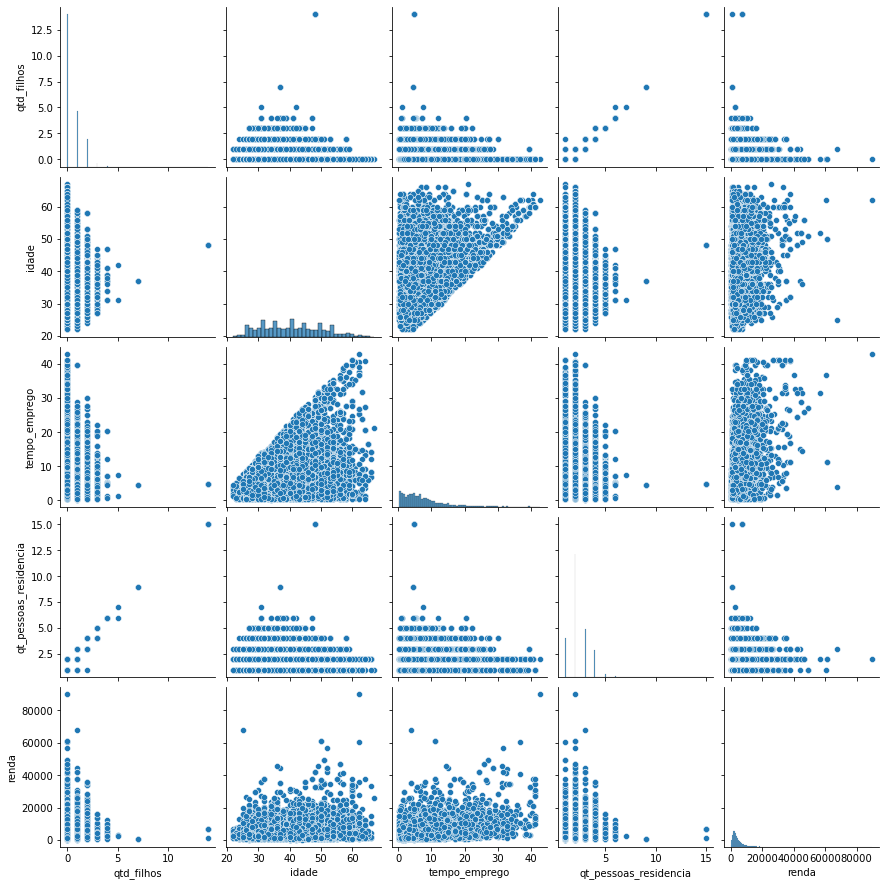

In [24]:
sns.pairplot(df_prev_renda)

###### A Correlação mais forte que vejo nos gráficos acima é entre a quantidade de filhos e quantidade de pessoas na casa. Existe ainda algumas correlações fracas entre renda e tempo de emprego, e por útilmo idade e tempo de emprego.
###### Para tirar a dúvida vou fazer um heatmap e listar as correlações.

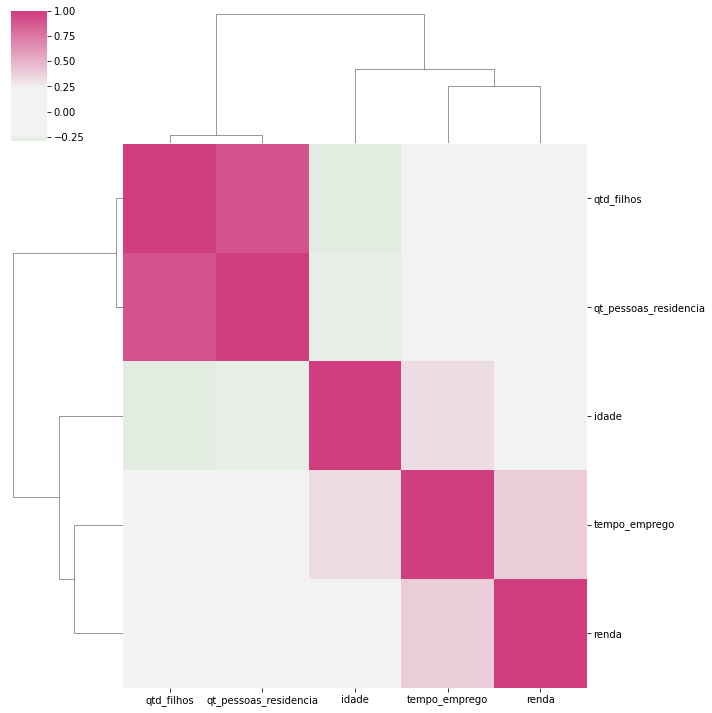

In [25]:
#print(df_prev_renda.corr())
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep=60, center='light')
sns.clustermap(df_prev_renda.corr(),figsize=(10,10), center=0, cmap=cmap)
#print(df_prev_renda)
#sns.pairplot(df_prev_renda, hue='sexo')

In [26]:
print(df_prev_renda.corr())

                       qtd_filhos     idade  tempo_emprego  \
qtd_filhos               1.000000 -0.289012      -0.074250   
idade                   -0.289012  1.000000       0.323934   
tempo_emprego           -0.074250  0.323934       1.000000   
qt_pessoas_residencia    0.908703 -0.257281      -0.065748   
renda                   -0.016189  0.151364       0.394235   

                       qt_pessoas_residencia     renda  
qtd_filhos                          0.908703 -0.016189  
idade                              -0.257281  0.151364  
tempo_emprego                      -0.065748  0.394235  
qt_pessoas_residencia               1.000000 -0.004865  
renda                              -0.004865  1.000000  


2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

<AxesSubplot:xlabel='tempo_emprego', ylabel='renda'>

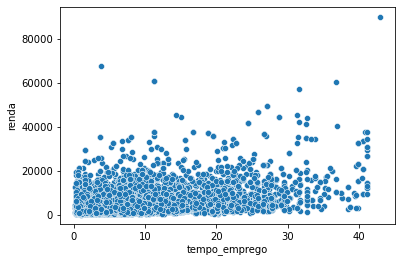

In [27]:
sns.scatterplot(x='tempo_emprego',y='renda',data = df_prev_renda)

<AxesSubplot:xlabel='idade', ylabel='renda'>

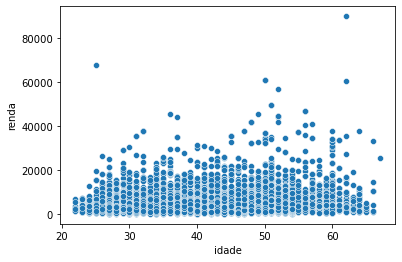

In [28]:
sns.scatterplot(x='idade',y='renda',data = df_prev_renda)

3) Na su aopinião, há outliers na variável renda?

Sim, existe alguns pontos com uma renda bem superior a maioria dos casos.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [29]:
df_log = df_prev_renda.copy()
df_log['log_renda'] = np.log(df_log['renda'])
#df_log

<AxesSubplot:xlabel='tempo_emprego', ylabel='log_renda'>

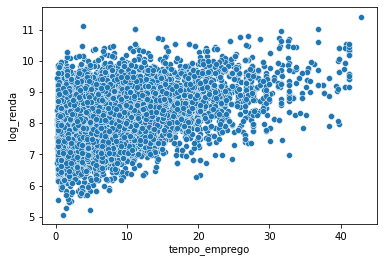

In [30]:
sns.scatterplot(x='tempo_emprego',y='log_renda',data = df_log)

<AxesSubplot:xlabel='idade', ylabel='log_renda'>

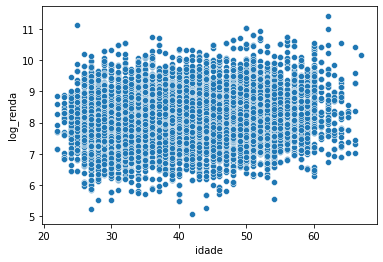

In [31]:
sns.scatterplot(x='idade',y='log_renda',data = df_log)

In [32]:
df_log.corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,log_renda
qtd_filhos,1.000000,-0.289012,-0.074250,0.908703,-0.016189,-0.005300
idade,-0.289012,1.000000,0.323934,-0.257281,0.151364,0.145638
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235,0.379556
qt_pessoas_residencia,0.908703,-0.257281,-0.065748,1.000000,-0.004865,0.008412
renda,-0.016189,0.151364,0.394235,-0.004865,1.000000,0.836656
log_renda,-0.005300,0.145638,0.379556,0.008412,0.836656,1.000000


Mesmo utilizando o log de renda a correlação é muito baixa. Na verdade diminuiu um pouco.

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

A aplicação do log piorou a análise visto o índice de correção atingido.